the equation being used is KE = fh - W 
Where KE is kinetic energy, f is frequency, h is planks constant and W is the work function of the material. 

For Lab notebook 
https://canvas.auckland.ac.nz/courses/89368/files/folder/Laboratories?preview=11272535


In [9]:
#dependancies
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as un
import pandas as pd
import statistics as st

def j_to_ev(j):
    return j * 6.242e18

def ev_to_j(ev):
    return ev/6.242e18

def ev_to_v(ev):
    return ev / 1.602e-19

def v_to_ev(v):
    return v * 1.602e-19


In [10]:
#importing data
xls = pd.ExcelFile("Data.xlsx")
df1 = pd.read_excel(xls,"Sheet1")
df2= pd.read_excel(xls,"Sheet2")
df3= pd.read_excel(xls,"Sheet3")
df4= pd.read_excel(xls,"Sheet4")
df_list = [df1,df2,df3,df4]


In [11]:
#Making dictionary contain all elements
#i.e key "apperture 8, wavelength 5.77e-07":[1,2,3,4] do for each element

wave_list = [3e8/5.770000e-07,3e8/5.460000e-07,3e8/4.360000e-07,3e8/4.050000e-07,3e8/3.650000e-07]

data_dic = {}
for df in df_list: # for getting the correct df
    for x in range(0,5): # for getting wavelength as key
        for y in range(1,4): #for getting the correct element
            element = df.iloc[x,y]
            if ("apperture "+str(2**y) +", wavelength " +str(wave_list[x])) in data_dic.keys(): # keys look like app2 5.77000e-07 for apperature 2, wavelength 
                data_dic["apperture "+str(2**y) +", wavelength " +str(wave_list[x])].append(element)
            else:
                data_dic.update({"apperture "+str(2**y) +", wavelength " +str(wave_list[x]):[element]})


In [12]:
#uncertainty and avg value
def avg(a_list):
    return sum(a_list)/len(a_list)

for key in data_dic.keys():
    in_use_list = data_dic[key]
    standev = st.stdev(in_use_list)
    average_value = avg(in_use_list)
    data_dic.update({key:un.ufloat(average_value,standev)})
    
print(data_dic)

{'apperture 2, wavelength 519930675909878.6': 0.5680000000000001+/-0.03248589437484108, 'apperture 4, wavelength 519930675909878.6': 0.58+/-0.006782329983125274, 'apperture 8, wavelength 519930675909878.6': 0.56975+/-0.006551081335677799, 'apperture 2, wavelength 549450549450549.4': 0.6607500000000001+/-0.014361406616345085, 'apperture 4, wavelength 549450549450549.4': 0.6832499999999999+/-0.009358596760910946, 'apperture 8, wavelength 549450549450549.4': 0.6707500000000001+/-0.007274384280931738, 'apperture 2, wavelength 688073394495412.9': 1.10625+/-0.024904818810824472, 'apperture 4, wavelength 688073394495412.9': 1.1709999999999998+/-0.014023789311975135, 'apperture 8, wavelength 688073394495412.9': 1.1505+/-0.0077244201508376515, 'apperture 2, wavelength 740740740740740.8': 1.31325+/-0.033539777379503685, 'apperture 4, wavelength 740740740740740.8': 1.4125+/-0.015609825965290808, 'apperture 8, wavelength 740740740740740.8': 1.39075+/-0.007719024117939615, 'apperture 2, wavelength 

[0.5725833333333333+/-0.011275588183721885, 0.6715833333333333+/-0.006207074816512023, 1.1425833333333333+/-0.009869050012445367, 1.3721666666666668+/-0.01259703080829706, 1.8040833333333335+/-0.010250112917173865]
6.5329372974056585e-34
8.083671284455061e-36
[ 3.95434936e-15 -1.51317748e+00]
0.9560520089422397


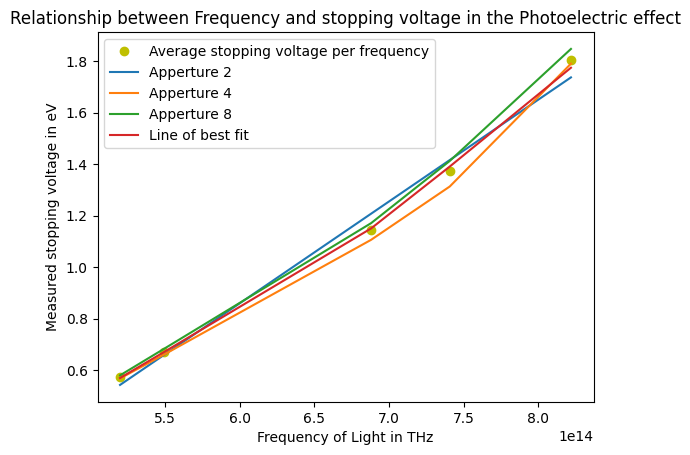

In [18]:
#finding plank's constant
app2_list =[]
app4_list =[]
app8_list =[]
for key in data_dic.keys(): #making three lists that can be combined into one later one.
    if "apperture 2," in key:
        app2_list.append(data_dic[key])
    elif "apperture 4," in key:
        app4_list.append(data_dic[key])
    elif "apperture 8," in key:
        app8_list.append(data_dic[key])

combined_list = []
for x in range(0,5):
    a = app2_list[x]
    b = app4_list[x]
    c = app8_list[x]
    value_add = (a+b+c)/3
    combined_list.append(value_add)

print(combined_list)
app2_list_nom = []
app2_list_stdev = []
for element in app2_list:
    app2_list_nom.append(element.nominal_value)
    app2_list_stdev.append(element.std_dev)

app4_list_nom = []
app4_list_stdev = []
for element in app4_list:
    app4_list_nom.append(element.nominal_value)
    app4_list_stdev.append(element.std_dev)

app8_list_nom = []
app8_list_stdev = []
for element in app8_list:
    app8_list_nom.append(element.nominal_value)
    app8_list_stdev.append(element.std_dev)

def slope(x,y,x1,y1):
    return (y-y1)/(x-x1)

#plank value
h = (1.602e-19*slope(wave_list[4],combined_list[4],wave_list[0],combined_list[0])) #just using the first and last point to get slope
print(h.nominal_value)
print(h.std_dev)

#finding line of best fit and uncertainty
coef = np.polyfit(wave_list,[element.nominal_value for element in combined_list],1)
print(coef)
poly1d_fn = np.poly1d(coef)
print((coef[0]*1.602e-19)/(6.62607015e-34) )

#plots
plt.plot(wave_list,[element.nominal_value for element in combined_list],'yo',wave_list,poly1d_fn(wave_list))
plt.plot(wave_list,app2_list_nom)
plt.plot(wave_list,app4_list_nom)
plt.plot(wave_list,app8_list_nom)
plt.xlabel("Frequency of Light in THz")
plt.ylabel("Measured stopping voltage in eV")
plt.title("Relationship between Frequency and stopping voltage in the Photoelectric effect")
plt.legend(["Average stopping voltage per frequency","Apperture 2","Apperture 4","Apperture 8","Line of best fit"])
plt.show()
